# Simple Linear regression

Predicting the marks scored by the student based on the number of hours studied. 

In [29]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [27]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [4]:
data.head()

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.shape

(25, 2)

In [7]:
#check the null values of dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Visualizing Data

<Figure size 720x720 with 0 Axes>

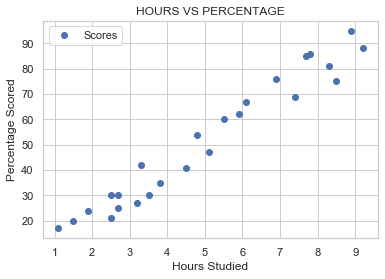

In [8]:
# Plotting the distribution of scores

sns.set(style='whitegrid')
plt.figure(figsize=(10,10))
data.plot(x='Hours', y='Scores', style='o')
plt.title('HOURS VS PERCENTAGE') 
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')
plt.show()

# Checking Outliers

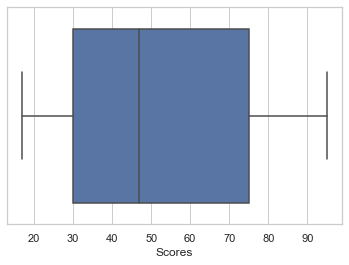

In [11]:
plt.figure()
sns.boxplot(x='Scores',data=data)

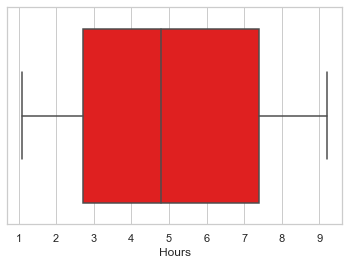

In [12]:

plt.figure()
sns.boxplot(x='Hours',data=data,color='red')

# Building Model

# 1) Preparing the data

In [13]:
x=data.iloc[:,:-1].values
y=data.iloc[:, 1].values

In [14]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [16]:
from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# 2) Training the algorithm

In [17]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(x_train, y_train)
print("Training complete.")

Training complete.


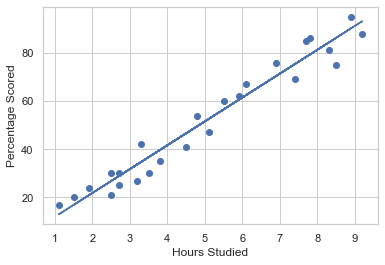

In [18]:
# Plotting the regression line with coefficient and intercept
line = lr.coef_*x+ lr.intercept_

# Plotting for the test data
sns.set(style='whitegrid')
plt.scatter(x, y)
plt.plot(x, line)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

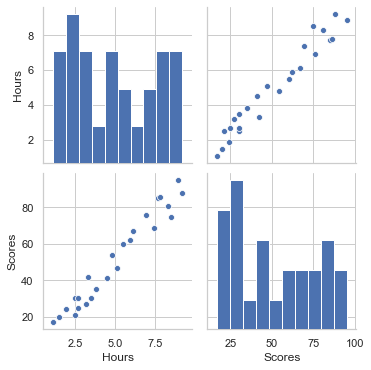

In [19]:

sns.set(style='whitegrid')
sns.pairplot(data)

# 3) Testing the algorithm

In [20]:

print(x_test)                        # Testing data - In Hours
y_pred = lr.predict(x_test)          # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Comparing actual vs predicted score

In [21]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


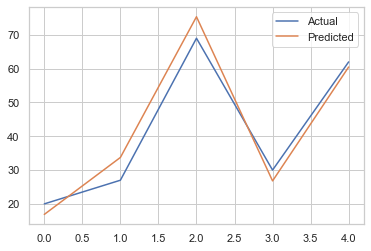

In [22]:
df.plot(kind='line',label='Actual',)
plt.legend()

# Predicted score only when student studies 9.25 hours a day?

In [23]:
hours = 9.25
my_prediction = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(my_prediction[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


# 4) Evaluating model

In [24]:
from sklearn import metrics  
mse=metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mse)

Mean Absolute Error: 4.183859899002982


In [25]:
print('Root Mean Squared Error:', np.sqrt(mse))

Root Mean Squared Error: 2.0454485813637513
